In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


from holisticai.efficacy.metrics import classification_efficacy_metrics
from holisticai.bias.metrics import classification_bias_metrics



In [4]:
os.chdir('C:\\Users\\Zezulka\\Documents\\01_PhD\\030-Projects\\2023-01_ALMP_LTU\\')

file = 'data\\1203_ALMP_effects_risk_fairFemale001.csv'
df = pd.read_csv(file)

df.head()

,Unnamed: 0,ID,age,canton_french,canton_german,canton_italian,canton_moth_tongue,city,city_big,city_medium,...,sd_policy_Austrian_risk_score_eo_lower_1,sd_policy_Austrian_risk_score_eo_lower_2,sd_policy_Austrian_risk_score_eo_lower_3,sd_policy_Austrian_risk_score_eo_lower_4,sd_policy_Austrian_risk_score_eo_lower_5,sd_policy_Austrian_risk_score_if_lower_1,sd_policy_Austrian_risk_score_if_lower_2,sd_policy_Austrian_risk_score_if_lower_3,sd_policy_Austrian_risk_score_if_lower_4,sd_policy_Austrian_risk_score_if_lower_5
0,1,29410,49,0,1,0,0,3,1,0,...,0.000000,0.025522,0.025522,0.027284,0.027284,0.082857,0.099913,0.056883,0.048936,0.111881
1,2,2306,47,0,1,0,0,1,0,0,...,0.129951,0.112460,0.099804,0.115060,0.111635,0.106649,0.107784,0.104306,0.078342,0.111952
2,3,48710,42,0,1,0,0,1,0,0,...,0.089981,0.118963,0.094978,0.074377,0.090354,0.090889,0.095031,0.119094,0.108857,0.108307
3,4,9665,50,0,1,0,0,1,0,0,...,0.000000,0.034346,0.035054,0.028043,0.034346,0.093497,0.083167,0.060916,0.096911,0.042485
4,5,65086,55,0,1,0,0,1,0,0,...,0.000000,0.000000,0.005230,0.005230,0.004892,0.104249,0.075866,0.100223,0.087461,0.065925


In [5]:
# Var list including all dummy categories.
risk_var_list = ["age","canton_moth_tongue","city_big","city_medium","city_no",
                   "emp_share_last_2yrs","emp_spells_5yrs",
                   "female","foreigner_b","foreigner_c","gdp_pc","married","other_mother_tongue","past_income",
                   "prev_job_manager","prev_job_sec_mis","prev_job_sec1","prev_job_sec2",
                   "prev_job_sec3","prev_job_self","prev_job_skilled","prev_job_unskilled",
                   "qual_semiskilled","qual_degree","qual_unskilled","qual_wo_degree",
                   "swiss","ue_spells_last_2yrs","unemp_rate"
                ]

In [6]:
X_train = df[df['training']==1][risk_var_list]
y_train = df[df['training']==1]['y_exit12']

X_test = df[df['training']==0][risk_var_list]
y_test = df[df['training']==0]['y_exit12']

male_train = df[df['training']==1]['female']
female_train = df[df['training']==1]['female']

male_test = df[df['training']==0]['female']
female_test = df[df['training']==0]['female']

# Logistic Regression

In [28]:
# Create a logistic regression model
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)
y_score_logreg = y_proba_logreg[:,1]

In [ ]:
classification_efficacy_metrics(y_pred_logreg, y_test)

# Random Forest

In [31]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)
y_proba_clf = clf.predict_proba(X_test)
y_score_clf = y_proba_logreg[:,1]


In [34]:
classification_efficacy_metrics(y_pred_clf, y_test)

,Value,Reference
Metric,,
Accuracy,0.634192,1
Balanced Accuracy,0.580324,1
Precision,0.641202,1
Recall,0.265916,1
F1-Score,0.375929,1


In [39]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced', criterion='entropy'), param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_rf = grid_search.best_params_
best_model_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_rf = best_model_rf.predict(X_test)
y_proba_rf = best_model_rf.predict_proba(X_test)
y_score_rf = y_proba_rf[:,1]

NameError: name 'accuracy_score' is not defined

In [41]:
classification_efficacy_metrics(y_pred_rf, y_test)

,Value,Reference
Metric,,
Accuracy,0.653322,1
Balanced Accuracy,0.640530,1
Precision,0.527252,1
Recall,0.591610,1
F1-Score,0.557580,1


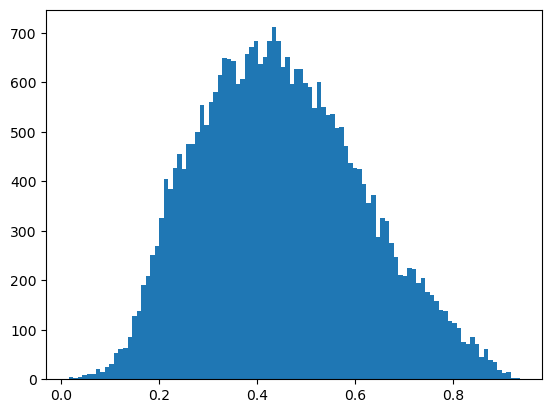

In [67]:
plt.hist(y_score_rf, bins=100)
plt.show()

In [42]:
best_model_rf

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=2, n_estimators=200)

In [45]:
from holisticai.bias.mitigation import ExponentiatedGradientReduction, GridSearchReduction, MetaFairClassifier

In [ ]:
MetaFairClassifier

In [62]:
# “DemographicParity”, “EqualizedOdds”, “TruePositiveRateParity”, “FalsePositiveRateParity”, “ErrorRateParity”,

rfc_egr_dp = ExponentiatedGradientReduction(
    estimator = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                                       max_depth=20, min_samples_leaf=2, n_estimators=200),
    eps = 0.5,
    constraints="DemographicParity",
    )

rfc_egr_dp.fit(X_train, y_train, male_train, female_train)

y_pred_egr_dp = rfc_egr_dp.predict(X_test)
y_proba_egr_dp = rfc_egr_dp.predict_proba(X_test)
y_score_egr_dp = y_proba_egr_dp[:,1]

C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\Lib\site-packages\holisticai\bias\mitigation\inprocessing\exponentiated_gradient\_lagrangian.py:187: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\Lib\site-packages\holisticai\bias\mitigation\inprocessing\exponentiated_gradient\_lagrangian.py:187: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\Lib\site-packages\holisticai\bias\mitigation\inprocessing\exponentiated_gradient\_lagrangian.py:187: FutureWarning: Serie

In [63]:
df_exp_grad = classification_bias_metrics(
    male_test,
    female_test,
    y_pred_egr_dp,
    y_test,
    metric_type='both'
)
df_exp_grad

,Value,Reference
Metric,,
Statistical Parity,0.0,0
Disparate Impact,1.0,1
Four Fifths Rule,1.0,1
Cohen D,0.0,0
2SD Rule,0.0,0
Equality of Opportunity Difference,0.0,0
False Positive Rate Difference,0.0,0
Average Odds Difference,0.0,0
Accuracy Difference,0.0,0


In [64]:
classification_efficacy_metrics(y_pred_egr_dp, y_test)

,Value,Reference
Metric,,
Accuracy,0.650554,1
Balanced Accuracy,0.638039,1
Precision,0.539715,1
Recall,0.584852,1
F1-Score,0.561377,1


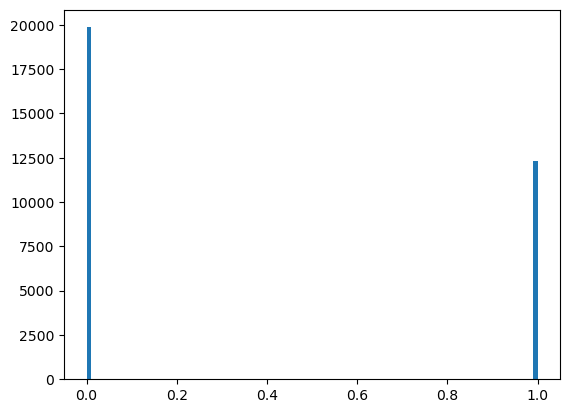

In [66]:
plt.hist(y_pred_egr_dp, bins=100)
plt.show()